In [1]:
import pickle
histories = []
for i in range(8):
    histories.append('histories/trial{}/acgan-history.pkl'.format(i))

In [2]:
import pickle


def load_data(idx):
    with open(histories[idx], 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
def get_min_loss(data):
    generator_test_loss = data['test']['generator']
    min_loss = float('inf')
    for epoch_loss in generator_test_loss:
        curr_loss = epoch_loss[0]
        if curr_loss < min_loss:
            min_loss = curr_loss
    return min_loss

def get_params(idx):
    with open('histories/trial{}/trail_params.txt'.format(idx), 'r') as f:
        data = [line for line in f]
    return data

In [4]:
min_loss = float('inf')
min_idx = float('inf')
losses = []
loss_to_idx = {}
for el in range(len(histories)):
    data = load_data(el)
    min_loss = get_min_loss(data)
    losses.append(min_loss)
    loss_to_idx[min_loss] = el
    
losses = sorted(losses)
idx = loss_to_idx[losses[-2]]
print(get_params(idx))

['batch_size = 100\n', 'adam_lr = 0.0002\n', 'adam_beta_1 = 0.5\n', 'sgd_lr = 0.0002\n', 'sgd_decay = 1e-6\n', 'sgd_momentum = 0.9\n', 'sgd_nesterov = True\n', '\n', 'discriminator: SGD\n', 'generator: Adam']


(0, 400)

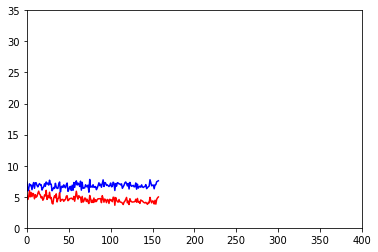

In [18]:
import matplotlib.pyplot as plt
import numpy as np

data = load_data(7)

gen_test = data['test']['generator']
gen_test = np.asarray(gen_test)
gen_test = gen_test[:, 0]

discrim_test = data['test']['discriminator']
discrim_test = np.asarray(discrim_test)
discrim_test = discrim_test[:, 0]

plt.plot(gen_test, color='red')
plt.plot(discrim_test, color='blue')
plt.ylim(0, 35)
plt.xlim(0, 400)

In [15]:
print(get_params(7))

['batch_size = 60\n', 'adam_lr = 0.0002\n', 'adam_beta_1 = 0.5\n', 'sgd_lr = 0.0002\n', 'sgd_decay = 1e-6\n', 'sgd_momentum = 0.9\n', 'sgd_nesterov = True\n', '\n', 'discriminator: SGD\n', 'generator: SGD']


In [ ]:
good_Generator = adam
discriminator = sgd

#0, 1, 4, 5